In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("covid_19_india.csv",parse_dates=["Date"],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [4]:
df.columns=["date","state","cured","deaths","confirmed"]
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [5]:
up=df[df["state"]=="Uttar Pradesh"]
up.head()

,date,state,cured,deaths,confirmed
39,2020-03-04,Uttar Pradesh,0,0,6
50,2020-03-05,Uttar Pradesh,0,0,7
55,2020-03-06,Uttar Pradesh,0,0,7
58,2020-03-07,Uttar Pradesh,0,0,7
72,2020-03-08,Uttar Pradesh,0,0,7


In [6]:
import datetime as dt

In [7]:
up["date"]=up["date"].map(dt.datetime.toordinal)
up.head()

<ipython-input-7-bd57d5a9629f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up["date"]=up["date"].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
39,737488,Uttar Pradesh,0,0,6
50,737489,Uttar Pradesh,0,0,7
55,737490,Uttar Pradesh,0,0,7
58,737491,Uttar Pradesh,0,0,7
72,737492,Uttar Pradesh,0,0,7


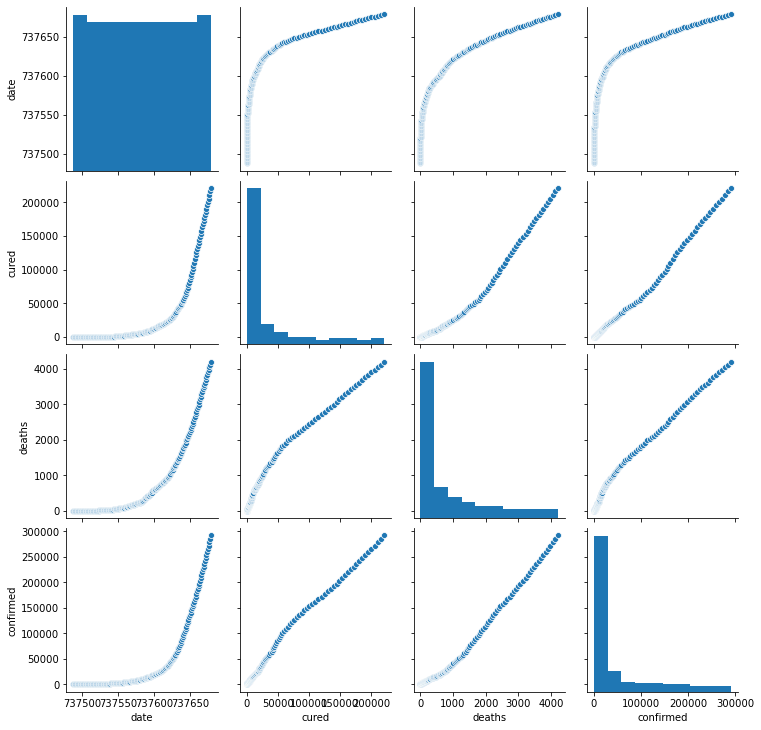

In [8]:
sns.pairplot(up[["date","state","cured","deaths","confirmed"]])

# Now,Transform the data

In [9]:
up["transconf"]=np.log(up["confirmed"])
up.head()

<ipython-input-9-bb137d4e848b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up["transconf"]=np.log(up["confirmed"])


,date,state,cured,deaths,confirmed,transconf
39,737488,Uttar Pradesh,0,0,6,1.791759
50,737489,Uttar Pradesh,0,0,7,1.945910
55,737490,Uttar Pradesh,0,0,7,1.945910
58,737491,Uttar Pradesh,0,0,7,1.945910
72,737492,Uttar Pradesh,0,0,7,1.945910


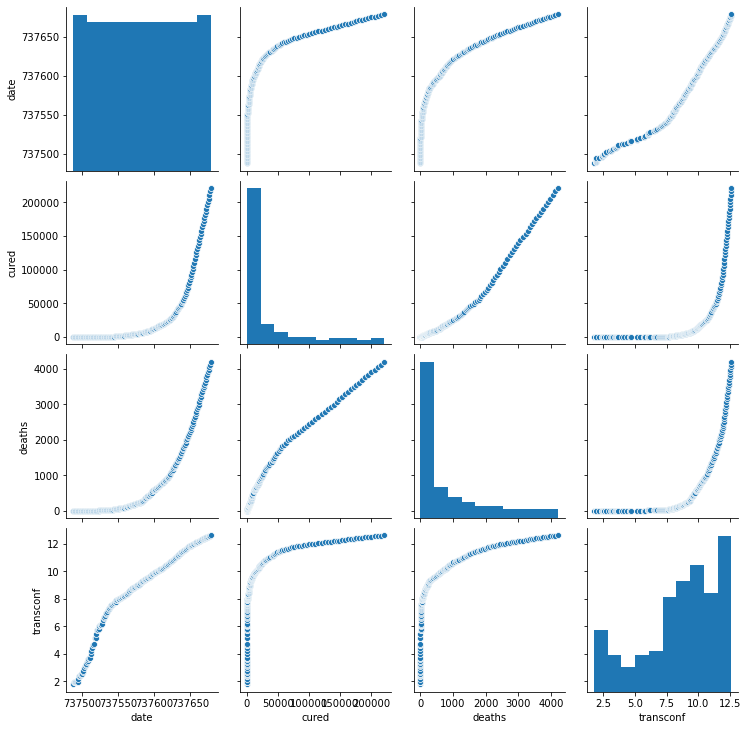

In [10]:
sns.pairplot(up[["date","state","cured","deaths","transconf"]])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
x=up[["date"]]
y=up[["transconf"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [13]:
model1=LinearRegression()

In [14]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [15]:
Accuracy1=model1.score(xtrain,ytrain)
Accuracy1

0.9262734116277926

In [16]:
ypred1=model1.predict(xtest)

In [17]:
ypred1

array([[10.34185182],
       [ 5.28963622],
       [10.23659733],
       [ 3.97395507],
       [ 5.18438173],
       [ 4.86861825],
       [11.39439674],
       [ 5.23700897],
       [ 4.34234579],
       [12.81533238],
       [ 6.81582635],
       [11.71016022],
       [ 3.92132783],
       [ 8.55252546],
       [ 6.28955389],
       [ 7.07896258],
       [ 9.28930691],
       [ 7.55260779],
       [13.28897759],
       [ 8.92091619],
       [ 9.86820661],
       [12.76270514],
       [13.34160484],
       [ 6.07904491],
       [ 5.76328143],
       [13.07846861],
       [10.18397009],
       [ 4.28971855],
       [11.49965123],
       [ 8.23676199],
       [10.55236081],
       [ 5.55277245],
       [10.28922458],
       [ 9.49981589],
       [ 7.49998055],
       [ 5.92116317],
       [10.92075153],
       [13.13109586],
       [ 7.65786228]])

In [18]:
ytest

,transconf
3960,10.384740
676,5.424950
3888,10.307885
103,2.197225
615,5.147494
444,4.007333
4669,11.255889
646,5.159055
206,2.772589
5614,12.192927


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
Er1=mean_squared_error(ypred1,ytest)
Er1


0.6600681817467204

In [21]:
mae1=mean_absolute_error(ypred1,ytest)
mae1

0.6369207283372421

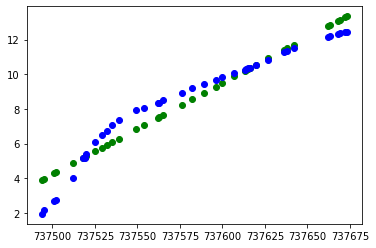

In [22]:
plt.scatter(xtest,ypred1,color="g")
plt.scatter(xtest,ytest,color="b")

In [23]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(criterion="mae",splitter="random")

In [24]:
model2.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mae', splitter='random')

In [25]:
Accuracy2=model2.score(xtrain,ytrain)
Accuracy2

1.0

In [26]:
ypred2=model2.predict(xtest)
ypred2

array([10.22944037,  5.72031178, 10.22944037,  2.39789527,  4.72738782,
        4.17438727, 11.3026858 ,  4.72738782,  2.94443898, 12.22109918,
        7.95822719, 11.48619127,  2.39789527,  9.18327745,  7.48324442,
        8.12355784,  9.71679646,  8.43489795, 12.39437213,  9.3999685 ,
       10.08813972, 12.22109918, 12.39437213,  6.98841318,  6.18001665,
       12.29891159, 10.22944037,  2.56494936, 11.39693083,  8.89343544,
       10.50440979,  6.01615716, 10.22944037,  9.8158578 ,  8.30819906,
        6.65027905, 10.88346644, 12.37055689,  8.43489795])

In [27]:
Er2=mean_squared_error(ypred2,ytest)
Er2

0.02512178231157724

In [28]:
mae2=mean_absolute_error(ypred2,ytest)
mae2

0.10659673819482816

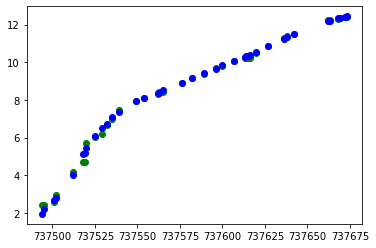

In [29]:
plt.scatter(xtest,ypred2,color="g")
plt.scatter(xtest,ytest,color="b")

In [30]:
from sklearn.svm import SVR
model3=SVR(C=100)

In [31]:
model3.fit(xtest,ytest)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100)

In [32]:
Accuracy3=model3.score(xtrain,ytrain)
Accuracy3

0.9990368379192277

In [33]:
ypred3=model3.predict(xtest)
ypred3

array([10.47696486,  5.3248908 , 10.40077184,  2.09702622,  5.04766462,
        4.19282194, 11.24204924,  5.18709131,  2.84190363, 12.20947502,
        7.976663  , 11.48271548,  2.01089535,  9.08304947,  7.38845212,
        8.17574386,  9.66757534,  8.45675072, 12.33817134,  9.36862364,
       10.12652963, 12.18565571, 12.34176313,  7.05937651,  6.45442977,
       12.30141214, 10.36237955,  2.72205773, 11.32191887,  8.86093139,
       10.62778278,  5.98099242, 10.43895809,  9.8377947 ,  8.42768751,
        6.77347473, 10.8917432 , 12.31385723,  8.51475878])

In [34]:
Er3=mean_squared_error(ypred3,ytest)
Er3

0.005149614239357227

In [35]:
mae3=mean_absolute_error(ypred3,ytest)
mae3

0.059905856936770224

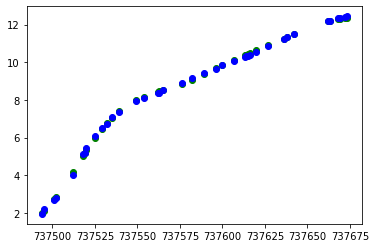

In [36]:
plt.scatter(xtest,ypred3,color="g")
plt.scatter(xtest,ytest,color="b")

In [37]:
print(Accuracy1)
print(Accuracy2)
print(Accuracy3)

0.9262734116277926
1.0
0.9990368379192277


In [38]:
print(Er1)
print(Er2)
print(Er3)

0.6600681817467204
0.02512178231157724
0.005149614239357227


In [39]:
print(mae1)

0.6369207283372421


In [40]:
Res=pd.DataFrame({"Model":["Linear Regression","Desicion Tree","SVR"],"Accuracy":[Accuracy1,Accuracy2,Accuracy3],"MSE":[Er1,Er2,Er3],"MAE":[mae1,mae2,mae3]},index=[1,2,3])
Res

,Model,Accuracy,MSE,MAE
1,Linear Regression,0.926273,0.660068,0.636921
2,Desicion Tree,1.000000,0.025122,0.106597
3,SVR,0.999037,0.005150,0.059906


In [41]:
Res.to_csv("Results for Regression Models(Uttar Pradesh).csv",index=False)

In [42]:
Res1=pd.read_csv("Results for Regression Models(Uttar Pradesh).csv")
Res1

,Model,Accuracy,MSE,MAE
0,Linear Regression,0.926273,0.660068,0.636921
1,Desicion Tree,1.000000,0.025122,0.106597
2,SVR,0.999037,0.005150,0.059906


# Now Predict the no .of cases

In [43]:
def find(x):
    a=model1.predict(np.array([[x]]))+model2.predict(np.array([[x]]))+model3.predict(np.array([[x]]))
    return a/3
    

In [44]:
ans=find(737675)
ans

array([[12.76036499]])

In [45]:
a=up[up["date"]==737675]
a

,date,state,cured,deaths,confirmed,transconf
6034,737675,Uttar Pradesh,200738,3920,266283,12.492315


In [46]:
ans=np.exp(ans)
ans

array([[348141.74400945]])

In [68]:
np.exp(a.transconf)

6034    266283.0
Name: transconf, dtype: float64

In [47]:
ytestf=np.exp(ytest)
ytestf

,transconf
3960,32362.0
676,227.0
3888,29968.0
103,9.0
615,172.0
444,55.0
4669,77334.0
646,174.0
206,16.0
5614,197388.0


In [48]:
ypred3f=np.exp(ypred3)
ypred3f

array([3.54885314e+04, 2.05385930e+02, 3.28849978e+04, 8.14192155e+00,
       1.55658518e+02, 6.62093667e+01, 7.62710899e+04, 1.78947293e+02,
       1.71483786e+01, 2.00681634e+05, 2.91219683e+03, 9.70241776e+04,
       7.47000265e+00, 8.80477507e+03, 1.61720094e+03, 3.55369740e+03,
       1.57970002e+04, 4.70673962e+03, 2.28244189e+05, 1.17149799e+04,
       2.49974633e+04, 1.95958016e+05, 2.29065468e+05, 1.16371937e+03,
       6.35511236e+02, 2.20006450e+05, 3.16463959e+04, 1.52115914e+01,
       8.26127137e+04, 7.05104695e+03, 4.12655289e+04, 3.95833006e+02,
       3.41650368e+04, 1.87283687e+04, 4.57191537e+03, 8.74344733e+02,
       5.37308823e+04, 2.22761558e+05, 4.98784276e+03])

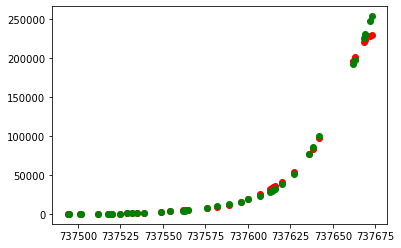

In [49]:
plt.scatter(xtest,ypred3f,color="r")
plt.scatter(xtest,ytestf,color="g")

In [51]:
def findarr(x):
    a=model1.predict(np.array(x).reshape(-1,1))+model2.predict(np.array(x).reshape(-1,1))+model3.predict(np.array(x).reshape(-1,1))
    return a/3
    

In [55]:
finpred=findarr(xtest)
finpred

array([[10.34941902,  7.12901813, 10.32402134, ..., 10.70568716,
        11.67542198,  9.09716952],
       [ 8.66534715,  5.44494626,  8.63994948, ...,  9.02161529,
         9.99135011,  7.41309765],
       [10.31433419,  7.0939333 , 10.28893651, ..., 10.67060233,
        11.64033715,  9.06208469],
       ...,
       [10.54238559,  7.3219847 , 10.51698791, ..., 10.89865373,
        11.86838855,  9.29013609],
       [11.27916703,  8.05876614, 11.25376935, ..., 11.63543517,
        12.60516999, 10.02691753],
       [ 9.45475584,  6.23435495,  9.42935816, ...,  9.81102398,
        10.7807588 ,  8.20250634]])

In [59]:
np.ndim(finpred)

2

In [65]:
finpred.size

1521

In [60]:
np.ndim(ytest)


2

In [66]:
ytest.size

39

ValueError: y_true and y_pred have different number of output (39!=1)

ValueError: x and y must be the same size

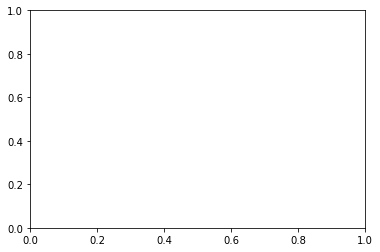

In [64]:
plt.scatter(xtest,finpred,color="r")
plt.scatter(xtest,ytest,color="g")